# ELO implementation

In [2]:
import sys
import os
from dotenv import find_dotenv, load_dotenv
import pandas as pd
import numpy as np


# Agrega la ruta del proyecto al sys.path si es necesario
sys.path.append(os.getenv("PROJECT_DIRECTORY"))

# Lee los archivos CSV
df_train = pd.read_csv(os.getenv("TRAINING_CSV"))
df_prediction = pd.read_csv(os.getenv("PREDICTION_CSV"))
df_train.head()

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
0,00-01,GER1,11/08/2000,Dortmund,Hansa Rostock,1,0,1,W
1,00-01,GER1,12/08/2000,Bayern Munich,Hertha Berlin,4,1,3,W
2,00-01,GER1,12/08/2000,Freiburg,VfB Stuttgart,4,0,4,W
3,00-01,GER1,12/08/2000,Hamburger SV,Munich 1860,2,2,0,D
4,00-01,GER1,12/08/2000,Kaiserslautern,Bochum,0,1,-1,L


In [3]:
from dfg_rating.model.network.base_network import WhiteNetwork

from dfg_rating.model.forecast.true_forecast import LogFunctionForecast
from dfg_rating.model.rating.controlled_trend_rating import ControlledTrendRating, ControlledRandomFunction

In [4]:
#Selecting only SPA1 teams and matches:
df_train_SPAIN = df_train[df_train['Lge']=='SPA1']
df_train_SPAIN.head()

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
95342,00-01,SPA1,09/09/2000,FC Barcelona,Malaga,2,1,1,W
95343,00-01,SPA1,09/09/2000,La Coruna,Athletic Bilbao,2,0,2,W
95344,00-01,SPA1,09/09/2000,Real Madrid,Valencia,2,1,1,W
95345,00-01,SPA1,09/09/2000,Real Sociedad,Santander,2,2,0,D
95346,00-01,SPA1,09/09/2000,Zaragoza,Espanyol Barcelona,1,2,-1,L


In [5]:
df_train_SPAIN.columns

Index(['Sea', 'Lge', 'Date', 'HT', 'AT', 'HS', 'AS', 'GD', 'WDL'], dtype='object')

In [6]:
networks = WhiteNetwork(
    data=df_train_SPAIN,
    mapping={
        "node1": {
            "id": "HT",
            "name": "HT",
        },
        "node2": {
            "id": "AT",
            "name": "AT",
        },
        "day": "Date",
        "dayIsTimestamp": True,
        "ts_format": "%d/%m/%Y",
        "season": "Sea",
        "winner": {
            "result": "WDL",
            "translation": {
                "W": "home",
                "D": "draw",
                "L": "away"
            }
        },
        "round": "day",
        "odds": {},
        "bets": {}
    }
)

C:\\Users\\Asus\\Desktop\\Phd\\Codigo\\dfg-rating\dfg_rating\model\network\base_network.py:525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.table_data[self.mapping['day']] = pd.to_datetime(
C:\\Users\\Asus\\Desktop\\Phd\\Codigo\\dfg-rating\dfg_rating\model\network\base_network.py:529: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.table_data['Year'] = pd.DatetimeIndex(self.table_data[self.mapping['day']]).year
C:\\Users\\Asus\\Desktop\\Phd\\Codigo\\dfg-rating\dfg_rating\model\network\base_network

Network loaded correctly


In [7]:
networks.data

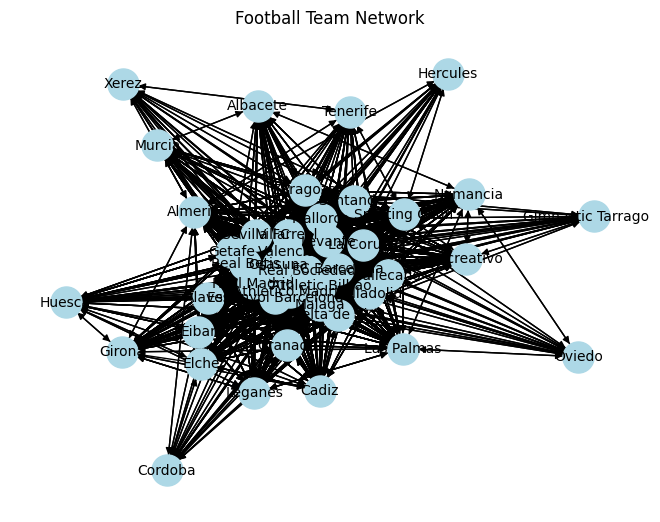

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

pos = nx.spring_layout(networks.data)  # Position nodes using a spring layout
nx.draw(networks.data, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black')
plt.title("Football Team Network")
plt.show()

In [8]:
print(f"Number of teams: {networks.data.number_of_nodes()} ")
print(f"Number of matches: {networks.data.number_of_edges()} ")
print(f"Number of matches per team: {networks.data.degree} ")

Number of teams: 42 
Number of matches: 8630 
Number of matches per team: [('FC Barcelona', 863), ('Malaga', 608), ('La Coruna', 608), ('Athletic Bilbao', 863), ('Real Madrid', 863), ('Valencia', 863), ('Real Sociedad', 749), ('Santander', 418), ('Zaragoza', 418), ('Espanyol Barcelona', 825), ('Villarreal', 825), ('Vallecano', 407), ('Numancia', 114), ('Oviedo', 38), ('Osasuna', 711), ('Celta de Vigo', 635), ('Las Palmas', 190), ('Alaves', 380), ('Mallorca', 597), ('Valladolid', 483), ('Tenerife', 76), ('Sevilla FC', 825), ('Real Betis', 711), ('Athletico Madrid', 787), ('Recreativo', 152), ('Albacete', 76), ('Murcia', 76), ('Levante', 532), ('Getafe', 673), ('Cadiz', 141), ('Gimnastic Tarragona', 38), ('Almeria', 255), ('Sporting Gijon', 228), ('Xerez', 38), ('Hercules', 38), ('Granada', 342), ('Elche', 179), ('Eibar', 266), ('Cordoba', 38), ('Leganes', 152), ('Girona', 103), ('Huesca', 76)] 


In [9]:
df_train_SPAIN.head()

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,Year
95342,00-01,SPA1,2000-09-09,FC Barcelona,Malaga,2,1,1,W,2000
95343,00-01,SPA1,2000-09-09,La Coruna,Athletic Bilbao,2,0,2,W,2000
95344,00-01,SPA1,2000-09-09,Real Madrid,Valencia,2,1,1,W,2000
95345,00-01,SPA1,2000-09-09,Real Sociedad,Santander,2,2,0,D,2000
95346,00-01,SPA1,2000-09-09,Zaragoza,Espanyol Barcelona,1,2,-1,L,2000


## ELO training:

### Basic ELO:

In [8]:
def elo_rating(home_elo, away_elo, result, k):
    
    # Calculate the expected outcome for the home team
    expected_home_win = 1 / (1 + 10 ** ((away_elo - home_elo) / 400))

    # Update Elo ratings based on the actual result
    if result == 'W':
        home_elo += k * (1 - expected_home_win)
        away_elo -= k * (1 - expected_home_win)

    elif result == 'L':
        home_elo -= k * expected_home_win
        away_elo += k * expected_home_win
    else:
        # Handle a draw
        home_elo += k * (0.5 - expected_home_win)
        away_elo -= k * (0.5 - expected_home_win)

    return home_elo, away_elo

In [9]:
# Initialize Elo ratings for all teams
all_teams = set(networks.data.nodes)
elo_ratings = {team: 1000 for team in all_teams}

# Calculate ELO ratings for each match in the network
for edge in networks.data.edges(data=True):
        home_team = edge[0]
        away_team = edge[1]
        result = edge[2]["WDL"]

        home_elo = elo_ratings[home_team]
        away_elo = elo_ratings[away_team]

        # Calculate new ELO ratings
        elo_ratings[home_team], elo_ratings[away_team] = elo_rating(home_elo, away_elo, result, k = 32)


In [10]:
def predict_match(home_team, away_team, elo_ratings):

    #Predict
    home_elo = elo_ratings.get(home_team, 1000) 
    away_elo = elo_ratings.get(away_team, 1000)
    expected_home_win = 1 / (1 + 10 ** ((away_elo - home_elo) / 400))
    return 'W' if expected_home_win > 0.5 else 'L' if expected_home_win < 0.5 else 'D'


# Example of predicting a future match
home_team = 'FC Barcelona'
away_team = 'Malaga'
prediction = predict_match(home_team, away_team, elo_ratings)
print(f"Prediction for {home_team} vs. {away_team}: {prediction}")

Prediction for FC Barcelona vs. Malaga: W


In [11]:
# Print Elo ratings for all teams
for team, elo in elo_ratings.items():
    print(f'{team}: Elo Rating = {elo}')

Athletic Bilbao: Elo Rating = 1036.3868344755354
FC Barcelona: Elo Rating = 1273.2292031028192
Hercules: Elo Rating = 975.8966679618384
Cordoba: Elo Rating = 867.3666834010339
Valladolid: Elo Rating = 948.2027360504609
Albacete: Elo Rating = 954.9660590295517
Real Betis: Elo Rating = 998.1140191092285
Eibar: Elo Rating = 1029.086649627096
Huesca: Elo Rating = 1020.6629425483741
Levante: Elo Rating = 1016.2777322141593
Osasuna: Elo Rating = 980.2534657069355
Real Madrid: Elo Rating = 1288.9948803393165
Almeria: Elo Rating = 994.0720830046137
Tenerife: Elo Rating = 986.3027970473595
Leganes: Elo Rating = 1004.2562311019053
Murcia: Elo Rating = 937.30492122141
Xerez: Elo Rating = 986.4244293086319
Mallorca: Elo Rating = 912.4658183477039
Alaves: Elo Rating = 973.2912112082433
Las Palmas: Elo Rating = 822.0635316607614
Sevilla FC: Elo Rating = 1021.6681879667743
La Coruna: Elo Rating = 963.8337260313767
Cadiz: Elo Rating = 1053.8979131990102
Espanyol Barcelona: Elo Rating = 1022.0494425526

### Optimal K parameter:

With RPS:

In [58]:
# Function to calculate RPS
def rank_probability_score(predictions, actual_results):
    
    n = len(predictions)
    rps = 0
    for i in range(n):
        for j in range(i + 1, n):
            pred_i = predictions[i]
            pred_j = predictions[j]
            actual_i = actual_results[i]
            actual_j = actual_results[j]
            rps += (pred_i - pred_j) ** 2
            rps += (actual_i - actual_j) ** 2
    return rps / (n * (n - 1))

# Function to find the best k parameter
def find_best_k(network, k_values):

    #Initialize the dictonary to store the RPS scores
    rps_scores = {}

    for k in k_values:

        # Initialize Elo ratings for all teams
        all_nodes = list(network.nodes)
        elo_ratings = {node: 1000 for node in all_nodes}

        # Calculate ELO ratings for each match in the network
        for edge in network.edges(data=True):
            home_team = edge[0]
            away_team = edge[1]
            result = edge[2]['WDL']

            # Calculate new elo ratings
            home_elo = elo_ratings[home_team]
            away_elo = elo_ratings[away_team]
            elo_ratings[home_team], elo_ratings[away_team] = elo_rating(home_elo, away_elo, result, k)

        predictions = []
        actual_results = []

        for edge in network.edges(data=True):
                home_team = edge[0]
                away_team = edge[1]
                actual_result = edge[2]['WDL']


                predicted_result = predict_match(home_team, away_team, elo_ratings)
                predictions.append(1 if predicted_result == 'W' else 0.5 if predicted_result == 'D' else 0)
                actual_results.append(1 if actual_result == 'W' else 0.5 if actual_result == 'D' else 0)


        rps = rank_probability_score(predictions, actual_results)
        rps_scores[k] = rps

    #print(rps_scores)
    # Find the k value with the lowest RPS
    best_k = min(rps_scores, key=rps_scores.get)
    return best_k

# K options predefined
k_values = [16, 24, 32, 48, 64]

# Calling the function to find the best k value:
best_k = find_best_k(networks.data, k_values)
print(f"Best K value: {best_k}")


Best K value: 64


In [59]:
# Print Elo ratings for all teams
for team, elo in elo_ratings.items():
    print(f'{team}: Elo Rating = {elo}')

Granada: Elo Rating = 826.2625897188406
Levante: Elo Rating = 981.9812082549251
Valladolid: Elo Rating = 941.5581161082492
Mallorca: Elo Rating = 1103.121312704644
Eibar: Elo Rating = 1065.5165569270919
Hercules: Elo Rating = 934.2809864493
Villarreal: Elo Rating = 1120.0952118667856
Osasuna: Elo Rating = 1000.0738286700782
Valencia: Elo Rating = 937.5952834157756
Vallecano: Elo Rating = 1006.0672906557297
Las Palmas: Elo Rating = 989.4809239798838
Zaragoza: Elo Rating = 1071.2964034565025
Sporting Gijon: Elo Rating = 970.1248731562613
La Coruna: Elo Rating = 954.8113195449075
Santander: Elo Rating = 1060.3585528776475
Albacete: Elo Rating = 930.3270049801258
Oviedo: Elo Rating = 978.9193491258092
Tenerife: Elo Rating = 934.1294746088546
Athletico Madrid: Elo Rating = 1298.5941220786317
Athletic Bilbao: Elo Rating = 1118.4685787563553
Numancia: Elo Rating = 887.0672047423973
Almeria: Elo Rating = 894.4449052647863
Cordoba: Elo Rating = 800.1305895145517
Real Madrid: Elo Rating = 1216.1

### ELO backward updates:

In [15]:
sorted_edges = sorted(networks.data.edges(data=True), key=lambda x: x[2]["Date"])
#sorted_edges

In [13]:
# Initialize Elo ratings for all teams
all_teams = set(networks.data.nodes)
elo_ratings = {team: 1000 for team in all_teams}

# Sort edges by date
sorted_edges = sorted(networks.data.edges(data=True), key=lambda x: x[2]["Date"])

# Iterate through matches and update Elo ratings
for index, edge in enumerate(sorted_edges):
    data = edge[2] 
    home_team, away_team = edge[0], edge[1]
    result = data["WDL"]

    # Calculate Elo ratings for the current match
    elo_ratings[home_team], elo_ratings[away_team] = elo_rating(elo_ratings[home_team], elo_ratings[away_team], result, k = 64)

    # Update Elo ratings for all previous matches with the same teams
    previous_matches = sorted_edges[:index]

    for prev_edge in previous_matches:
        prev_data = prev_edge[2] 
        prev_home_team, prev_away_team = prev_edge[0], prev_edge[1]
        prev_result = prev_data["WDL"]

        if (home_team == prev_home_team or home_team == prev_away_team or
            away_team == prev_home_team or away_team == prev_away_team):
            elo_ratings[prev_home_team], elo_ratings[prev_away_team] = elo_rating(
                elo_ratings[prev_home_team], elo_ratings[prev_away_team], prev_result, k = 64
            )

# Example of predicting a future match
home_team = 'FC Barcelona'
away_team = 'Malaga'
prediction = predict_match(home_team, away_team, elo_ratings)
print(f"Prediction for {home_team} vs. {away_team}: {prediction}")

Prediction for FC Barcelona vs. Malaga: W


In [14]:
# Print Elo ratings for all teams
for team, elo in elo_ratings.items():
    print(f'{team}: Elo Rating = {elo}')

Athletic Bilbao: Elo Rating = 1118.4685787563553
FC Barcelona: Elo Rating = 1195.0798971383992
Hercules: Elo Rating = 934.2809864493
Cordoba: Elo Rating = 800.1305895145517
Valladolid: Elo Rating = 941.5581161082492
Albacete: Elo Rating = 930.3270049801258
Real Betis: Elo Rating = 1105.5769675015274
Eibar: Elo Rating = 1065.5165569270919
Huesca: Elo Rating = 873.7091317164295
Levante: Elo Rating = 981.9812082549251
Osasuna: Elo Rating = 1000.0738286700782
Real Madrid: Elo Rating = 1216.1618749036693
Almeria: Elo Rating = 894.4449052647863
Tenerife: Elo Rating = 934.1294746088546
Leganes: Elo Rating = 1063.5433335443568
Murcia: Elo Rating = 930.2450884504199
Xerez: Elo Rating = 934.7716916364905
Mallorca: Elo Rating = 1103.121312704644
Alaves: Elo Rating = 988.3427777875957
Las Palmas: Elo Rating = 989.4809239798838
Sevilla FC: Elo Rating = 1108.5926090867022
La Coruna: Elo Rating = 954.8113195449075
Cadiz: Elo Rating = 1034.3082447024099
Espanyol Barcelona: Elo Rating = 934.76369181782